In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import sklearn

# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [13]:
dflogins= pd.read_json('logins.json')

# Part 1: Solution

In [14]:
dflogins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


The .json logins data file contain only one column of data providing date and time. 
I will have to add a few numerical columns to make it possible EDA and further analysis. 

In [18]:
dflogins = login_times.set_index('login_time')
dflogins['count'] = 1
dflogins

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


Since each count column ended up with a count score it will be better to group/aggregate the data. Lets use the .resample() method to aggregate the numebr of logins ito a 15-minute interval:

In [21]:
dflogins_15min = dflogins['count'].resample('15Min').sum()
dflogins_15min

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Name: count, Length: 9788, dtype: int64

In [ ]:
dflogins_15min = pd.DataFrame({'count': dflogins_15min.values, 'hour': dflogins_15min.index.hour, 'day_number': dflogins_15min.index.day, 'day_of_week': dflogins_15min.index.dayofweek}, index=dflogins_15min.index)

In [29]:
dflogins_15min

,count,hour,day_number,day_of_week
login_time,,,,
1970-01-01 20:00:00,2,20,1,3
1970-01-01 20:15:00,6,20,1,3
1970-01-01 20:30:00,9,20,1,3
1970-01-01 20:45:00,7,20,1,3
1970-01-01 21:00:00,1,21,1,3
...,...,...,...,...
1970-04-13 17:45:00,5,17,13,0
1970-04-13 18:00:00,5,18,13,0
1970-04-13 18:15:00,2,18,13,0


In [28]:
dflogins_15min.tail()

,count,hour,day_number,day_of_week
login_time,,,,
1970-04-13 17:45:00,5,17,13,0
1970-04-13 18:00:00,5,18,13,0
1970-04-13 18:15:00,2,18,13,0
1970-04-13 18:30:00,7,18,13,0
1970-04-13 18:45:00,6,18,13,0


In [30]:
dflogins_15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   count        9788 non-null   int64
 1   hour         9788 non-null   int64
 2   day_number   9788 non-null   int64
 3   day_of_week  9788 non-null   int64
dtypes: int64(4)
memory usage: 382.3 KB


Data has no missing values.

C:\Users\dzogl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dzogl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dzogl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dzogl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dzogl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dzogl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

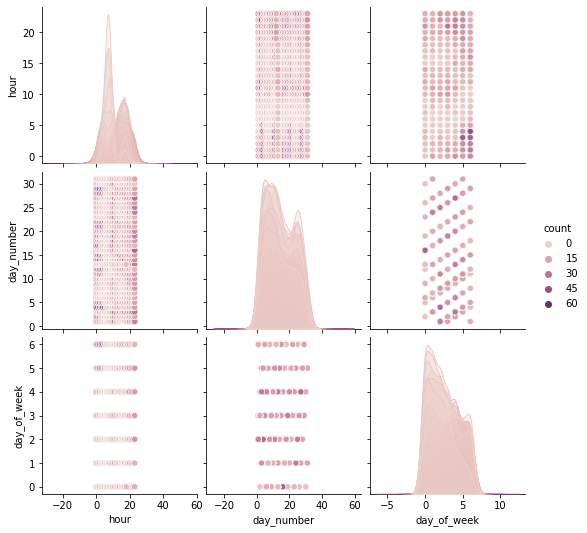

In [31]:
sns.pairplot(dflogins_15min,hue='count')

<AxesSubplot:>

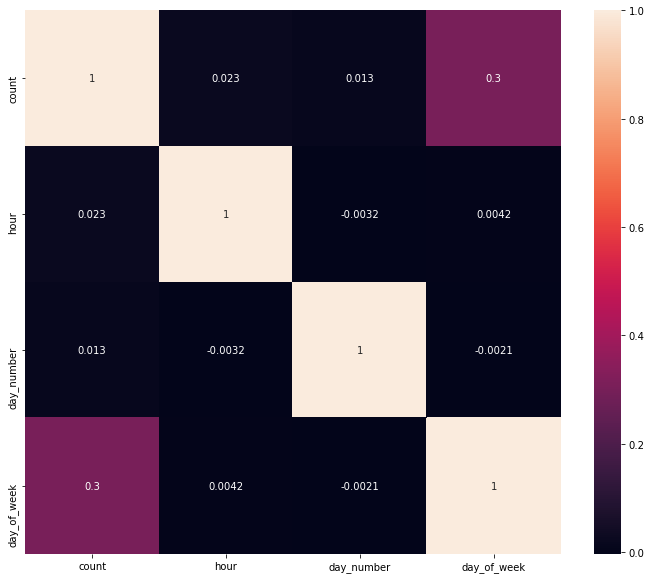

In [32]:
plt.subplots(figsize=(12,10))
sns.heatmap(dflogins_15min.corr(),annot=True)

There is weak correlation among data variables

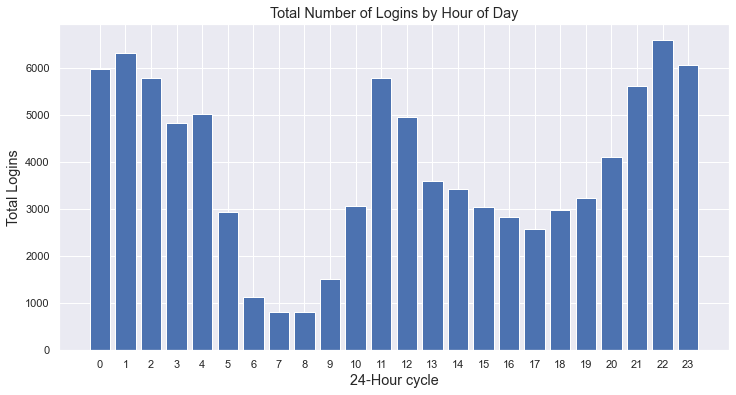

In [37]:
# group and calculate total number of logins by hour in day
dfhr =dflogins_15min.groupby('hour').sum()

_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = plt.bar(dfhr.index, dfhr['count'])
_ = plt.title('Total Number of Logins by Hour of Day', size='large')
_ = plt.xlabel('24-Hour cycle', size='large')
_ = plt.ylabel('Total Logins', size='large')
_ = plt.xticks(dfhr.index)

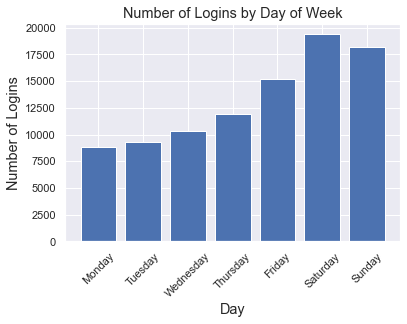

In [53]:
#How does login spread over the week? Let's generate a dataframe for weekly lognis
df_day = dflogins_15min.groupby('day_of_week').sum()
_ = plt.subplot(1, 1, 1)
_ = plt.bar(df_day.index, df_day['count'])
_ = plt.title('Number of Logins by Day of Week', size='large')
_ = plt.xlabel('Day', size='large')
_ = plt.ylabel('Number of Logins', size='large')
_ = plt.xticks(df_day.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],  rotation=45)

There is more logins on weekends than weekdays. Most likely due to visits to and from family. 

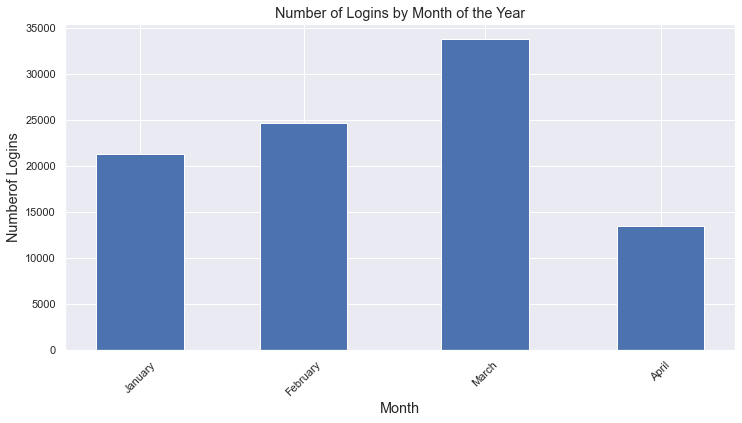

In [54]:
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = plt.bar(dflogins_15min['count'].resample('M').sum().index, dflogins_15min['count'].resample('M').sum(), width=15.0)
_ = plt.title('Number of Logins by Month of the Year', size='large')
_ = plt.xlabel('Month', size='large')
_ = plt.ylabel('Numberof Logins', size='large')
_ = plt.xticks(dflogins_15min['count'].resample('M').sum().index, ['January', 'February', 'March', 'April'], rotation= 45)

There is a steady increase in the first three months and dropped in April. This may not be accurate reflection of sctivities, given that there was no data for the rmaining months.

# Part 2 - Experiment and Metrics Design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, 
Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends,
there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend 
to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment 
to encourage driver partners to be available in both cities, by reimbursing all toll costs.

# 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

# Answer

Ultimate currently is experiencing issues with a disproportionate number of partner drivers servicing one city over another at particular times due to a toll bridge. To measure success, a key matrics to consider is the pick location customer wait time within a region and the pickup location of pessengers relative to a driver's zip code If drivers are evenly distributed, customer wait time will be less and fairly equall between the two cities if the toll reimburment program is effective. if the toll is the main barier, then drivers pick distance from their zip code will increase compared to previous.

# Describe a practical experiment you would design to compare the effectiveness of theproposed change in relation to the key measure of success. Please provide details on:

In [ ]:
Answer

I will collect data on customer wait time as well as and driver's distance travelled with zip code and outside their zip code.
For statistical analysis the following dataset will be collected via an app. Customer ID, pick up location, drop off, trip duration(Date and time of pickup and drop off), driver ID and address. The data will be collected prior to implimentation of the policy and during the trial period. This anable comparative analysis of driver service availability. The hypothesis to test will be that reimbursment of tolls result in less wait time for customers due to readily available driving service and driver's non-preference for either city. The data on driver's home address/zip code and their pick location will also help tell how willing service providers were before and during the experiment to travel to either city.  

# b) what statistcal test(s) you will conduct to verify the significance of the observation

Answer

I would generate bootstrap samples with replacement for both datasets (the wait times when drivers were receiving toll reimbursements data and the wait times when drivers were not receiving toll reimbursements data). The distribution of the average wait times for both datasets over that time period and a test for significant difference between customer wait time for the two dataset will be conducted usin 95% confidence interval. 

# c) how you would interpret the results and provide recommendations to the cityoperations team along with any caveats.

Answer

To interpret results, I would couple test significance difference outcome with EDA with graphs showing I would not only analyze the overall average wait times for the entire region, but also how the average wait times were impacted within each city. The distribution of Pickup and Drop Off hours of the day, pickup and drop off days, trip duration, customer pickup location, driver's home address(distance away from own city). I will also look at the relationship between pickup location and with customer time. 
weekday and weeknight results for each of the cities will be analyzed because we know that the demands for rides fluctuates during the week (with Metropolis being more active during the day and Gotham more active at night). I would want to see if the average wait time in Metropolis during weeknights and the average wait time in Gotham during weekdays decreased, as those numbers should be an indication that reimbursing tolls is incentivizing the partner drivers to service other areas outside of their jurisdiction. 

If the toll reimbursement experiment is working, we expect significant reduction in customer wait time, compared to before. Furthermore, customer pickup location of drivers should also change significantly if the toll was a main reason for drivers stayin within their cities. 
If our predictions are supported by the data, a recomendation will be made to Ultimate. I would also recommed a follow up study to infer customer satistaction and its impact on revenue generation.

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

In [5]:
with open('ultimate_data_challenge.json') as f:
    
    data = json.load(f)
df = pd.DataFrame(data)

In [6]:
display(df.shape)
display(df.info())
display(df.columns)

(50000, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


None

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [9]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


The following parameters have missing data: phone, average rating of driver and average rating by driver.

There are 50K data points, there are few features with missing values. Average rating of driver(8122), phone(396), and average rating by driver(201).

We will fill missing values with mean for numerical data and for phone, instead of speculating as to which kind of phone they had, I will simply change the NaN values to 'Unknown'

In [57]:
df['phone'] = df['phone'].fillna('Unknown')
df['phone'].value_counts()

iPhone     34582
Android    15022
Unknown      396
Name: phone, dtype: int64

In [58]:
#Leta look at the count for each rating to decide on how to fillna
df['avg_rating_by_driver'].value_counts()

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

Though majority of the ratings was 5.0, I want to avoid using that to fill NAN, rather we will replace nan with average ratings.

In [59]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna((df['avg_rating_by_driver'].mean()))
df['phone'].value_counts()

In [60]:
df['avg_rating_by_driver'].value_counts()

5.000000    28508
4.800000     4537
4.700000     3330
4.900000     3094
4.500000     2424
4.600000     2078
4.000000     1914
4.300000     1018
4.400000      860
3.000000      602
4.200000      342
4.778158      201
3.500000      199
3.700000      195
1.000000      181
2.000000      126
4.100000      125
3.800000      111
3.300000       47
3.900000       41
2.500000       31
3.600000       19
3.400000        5
1.500000        4
2.800000        3
3.200000        2
2.700000        2
2.300000        1
Name: avg_rating_by_driver, dtype: int64

The 201 missing values have been replaced with 4.7, which is the average

In [61]:
df['avg_rating_of_driver'].value_counts(dropna=False)

5.0    20771
NaN     8122
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
2.2        1
1.9        1
1.6        1
Name: avg_rating_of_driver, dtype: int64

 About 8122(20%) of the avg_rating_of_driver data is missing. Again average ratings will be used to fill in missing data

In [63]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna((df['avg_rating_of_driver'].mean()))

In [64]:
df['avg_rating_of_driver'].value_counts(dropna=False)

5.000000    20771
4.601559     8122
4.000000     4193
4.500000     2498
4.800000     2430
4.700000     1945
4.900000     1771
4.300000     1487
4.600000     1143
3.000000     1003
4.400000      829
4.200000      601
3.500000      488
3.800000      428
4.100000      398
3.700000      364
1.000000      256
3.900000      255
2.000000      209
3.300000      201
3.600000      172
3.400000      108
2.500000       94
3.200000       53
2.700000       47
3.100000       39
2.800000       28
2.300000       22
2.900000       13
2.600000       12
2.100000        6
1.500000        4
2.400000        3
1.800000        2
1.700000        2
2.200000        1
1.600000        1
1.900000        1
Name: avg_rating_of_driver, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#nan are all filled in and data looks good so far. 

The datatypes have to be corrected. Dates should be datetime and not object

In [69]:
#convert the date features from strings to datetime values
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [70]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


To find retention we need a data set showing active/retained and non-active/not-retained riders
A rider is consider retained if the were “active” (i.e. took a trip) in the preceding 30 days.
The data is lacking the active data, I will now create the an active label that we will use to build our model.

#Lets creat an active label

In [73]:
# determine the lastest trip date in the dataset
df['last_trip_date'].sort_values(ascending=False)

45357   2014-07-01
22735   2014-07-01
14473   2014-07-01
38651   2014-07-01
45126   2014-07-01
           ...    
37295   2014-01-01
34828   2014-01-01
40336   2014-01-01
10729   2014-01-01
31425   2014-01-01
Name: last_trip_date, Length: 50000, dtype: datetime64[ns]

The first trip was Jan 1st and latest trip date in the dataset is July 1st. Thirty days prior to July 1st is June 1st. Lets us this information to create an active data column

In [74]:
# create the active column
df['active'] = df['last_trip_date'] >= '2014-06-01'

In [76]:

# quality control check that active column was generated correctly
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
5,Winterfell,2,2014-01-09,3.500000,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True
6,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,False
7,Winterfell,2,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,False
8,Winterfell,2,2014-01-21,4.500000,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,False
9,Winterfell,1,2014-01-03,4.601559,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,False


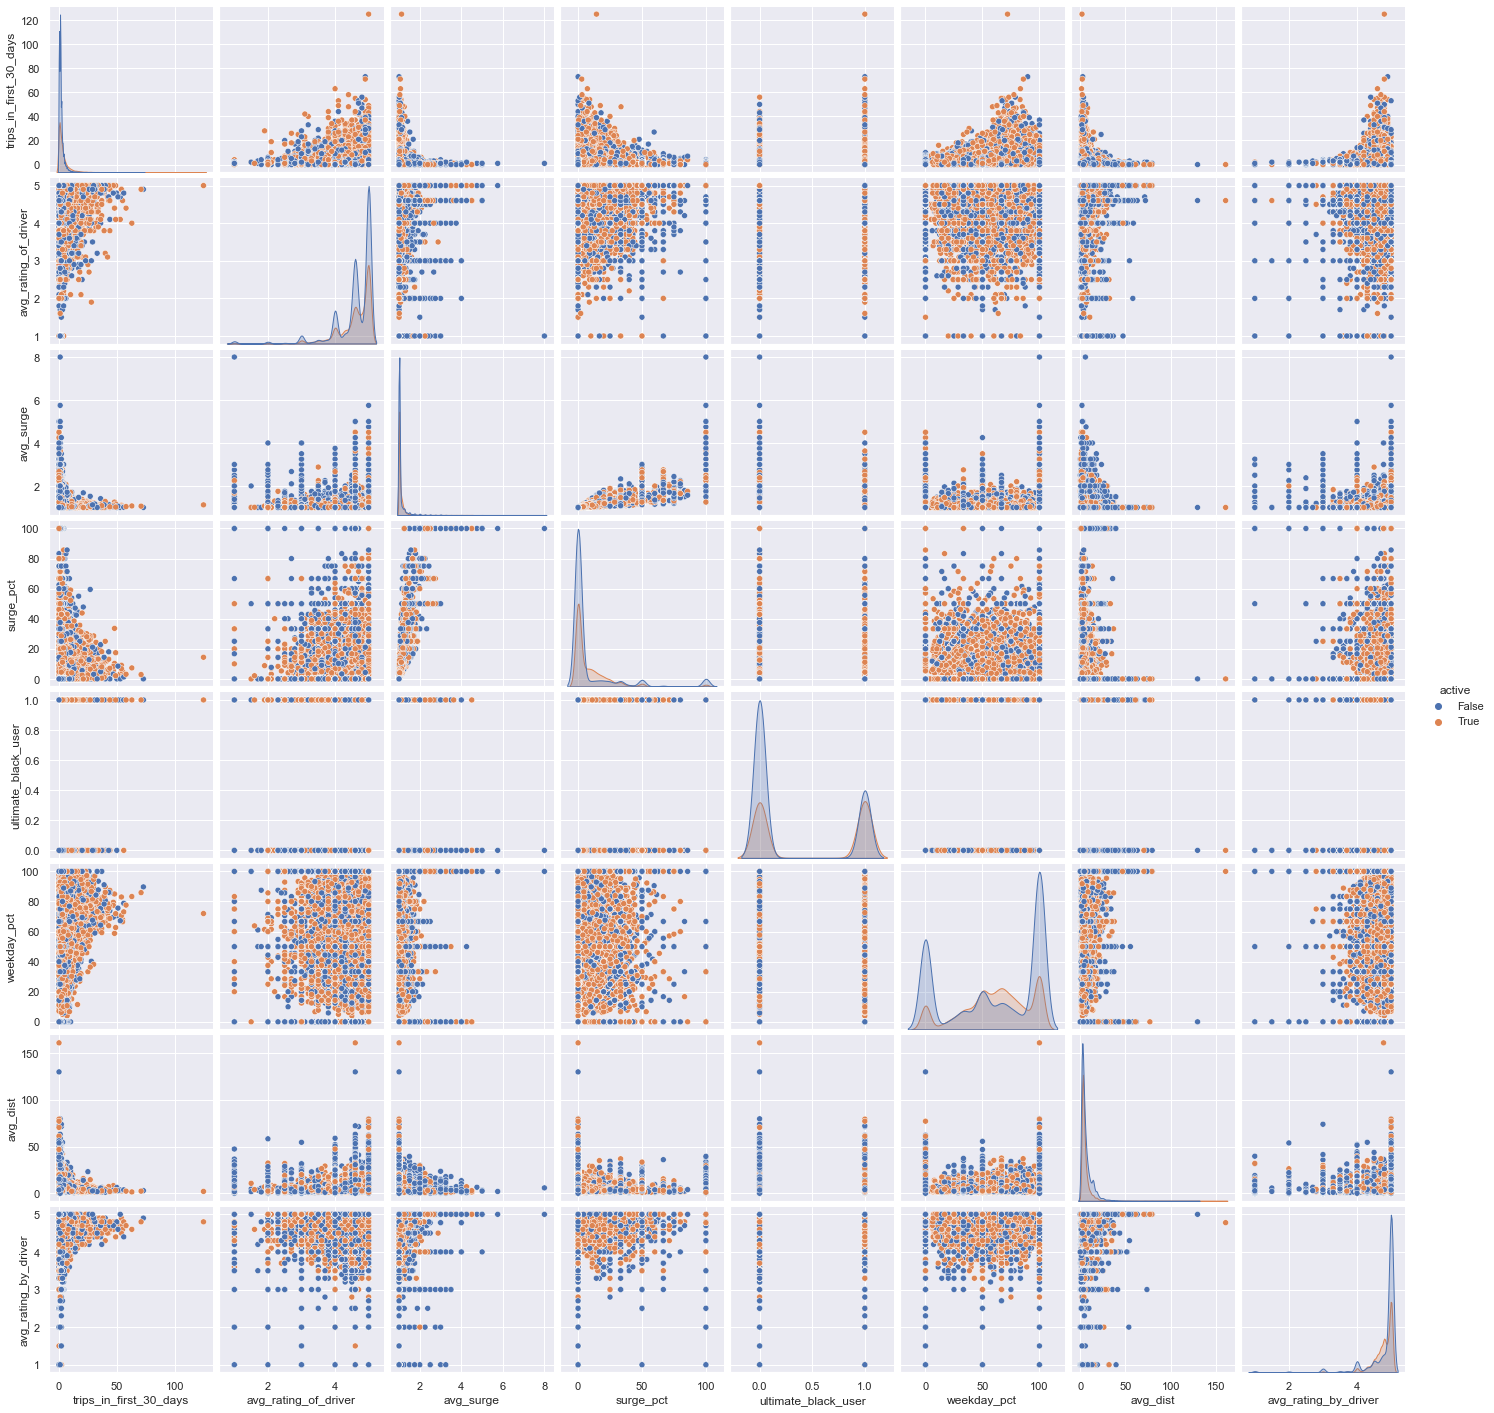

In [79]:
#Let's look at the pairwise correlations in a graphical format
sns.pairplot(df,hue='active')

In [ ]:
#Looking at trips in the first 30 days and the active data, suggest there is a good sign for retention. 

<AxesSubplot:>

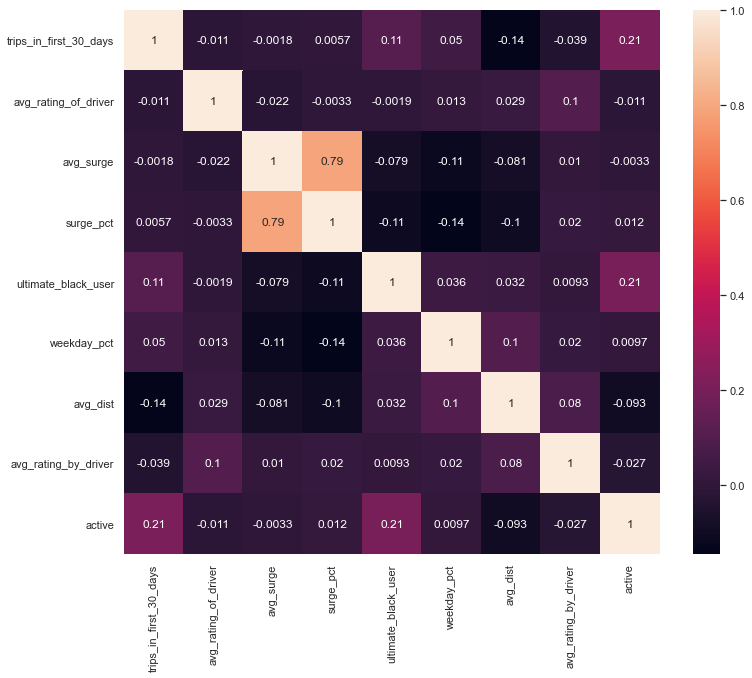

In [80]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [87]:
#Check for target counts
df.trips_in_first_30_days.value_counts()

0      15390
1      14108
2       7402
3       3788
4       2562
5       1616
6       1134
7        819
8        589
9        471
10       349
11       301
12       221
13       168
15       155
14       147
17       113
16       108
18        80
19        69
20        51
23        45
21        40
22        34
24        33
27        28
28        21
25        20
26        19
30        15
34        11
29         9
33         9
37         9
32         8
31         6
44         5
40         5
38         4
43         4
47         3
42         3
36         3
39         3
53         2
55         2
56         2
54         2
48         2
49         2
35         2
125        1
73         1
58         1
71         1
41         1
50         1
51         1
63         1
Name: trips_in_first_30_days, dtype: int64

In [102]:
#Check for active counts and % distribution
active =(df.active.value_counts()/50000)*100
active.head()

False    62.392
True     37.608
Name: active, dtype: float64

In [111]:
#Check for active counts and % distribution, save as a dataframe
active =(df.active.value_counts()/50000*100)
active.head()

False    62.392
True     37.608
Name: active, dtype: float64

#Here is another way to look calculate the proportion should you forget about the total data points 
active =(df.active.value_counts()/len(df)*100)
active.head()

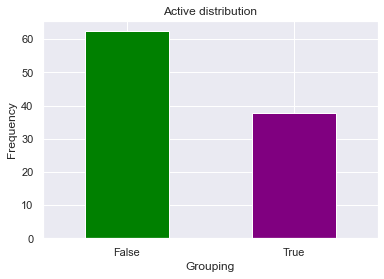

In [116]:
#Let's plot the prportiono of active riders in the past 30 days
#active =(df.active.value_counts()/50000*100), you can do this if you prefer not to have a seperate dataframe
active.plot(kind = 'bar',color=["Green", "purple"], rot=0)
plt.title("Active distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Grouping")
plt.ylabel("Frequency");

#There seem to be only 37% retention sa far based on the bar graph. Lets explore the data more

In [118]:
# create separate dataframes
df_active = df[df['active'] == True]
df_non_active = df[df['active'] == False]

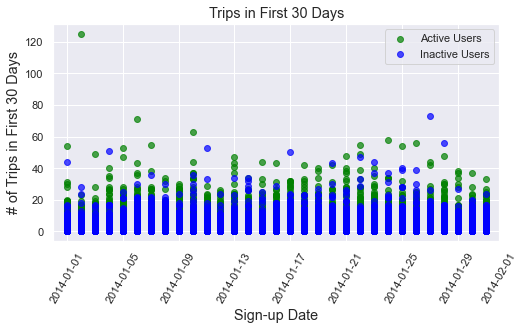

In [120]:
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.scatter(df_active['signup_date'], df_active['trips_in_first_30_days'], alpha=0.7, color='green')
_ = plt.scatter(df_non_active['signup_date'], df_non_active['trips_in_first_30_days'], alpha=0.7, color='blue')
_ = plt.xlim('2013-12-31', '2014-02-01')
_ = plt.title('Trips in First 30 Days', size='large')
_ = plt.xlabel('Sign-up Date', size='large')
_ = plt.ylabel('# of Trips in First 30 Days', size='large')
_ = plt.xticks(rotation=60)
_ = plt.legend(['Active Users', 'Inactive Users'], loc='best')
_ = plt.show()

Seems like people with more trips early on stayed on. lets look at other graphs showing this.

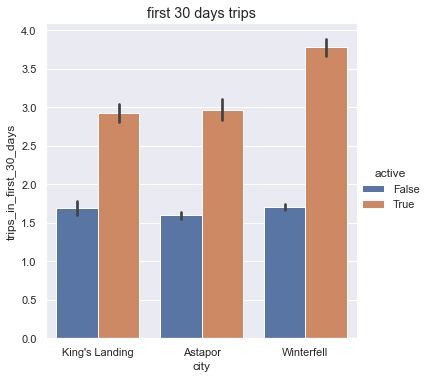

In [124]:
_ = sns.set()
_ = sns.catplot(x="city", y="trips_in_first_30_days", hue='active', kind='bar', data=df)
_ = plt.title("first 30 days trips", size='large')

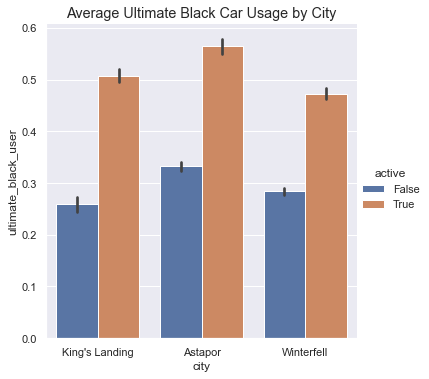

In [122]:
_ = sns.set()
_ = sns.catplot(x="city", y="ultimate_black_user", hue='active', kind='bar', data=df)
_ = plt.title("Average Ultimate Black Car Usage by City", size='large')


Does distance travel influence retention?

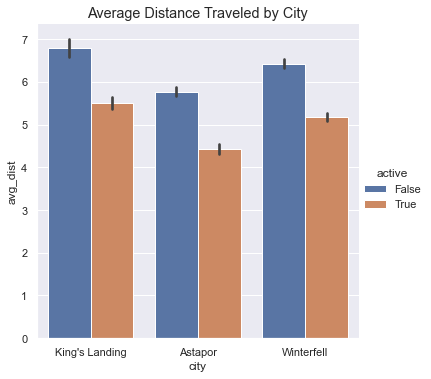

In [121]:
_ = sns.set()
_ = sns.catplot(x="city", y="avg_dist", hue='active', kind='bar', data=df)
_ = plt.title("Average Distance Traveled by City", size='large')

Exploratory Data Analysis Conclusions
Retention stood at 37% as at the end of the experiement
The more that users book trips during the first month of signing up for Ultimate, the more likely they are to remain an active user;
Active users average shorter distance trips, indicating that they are using the service for more of their day-to-day ordinary course travel needs;

Active users tend to use the ultimate black car service at a much higher rate than inactive users.

Lets set the data up for Model building. First let us noemalize numerical data and safe that in a new dataframe

#Let use .head() to look at the column index of the numeric data

In [129]:
df.head(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False


In [130]:
# Import and instantiate MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize the relevant features
x = df.iloc[:, [1, 3, 4, 7, 9, 10, 11]].values
x_scaled = min_max_scaler.fit_transform(x)

# Save the normalized values into a dataframe
df_s = pd.DataFrame(x_scaled, columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])


In [131]:
df_s.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,0.032,0.925,0.014286,0.154,0.462,0.022801,1.000
1,0.000,1.000,0.000000,0.000,0.500,0.051317,1.000
2,0.024,0.825,0.000000,0.000,1.000,0.004784,1.000
3,0.072,0.900,0.020000,0.200,0.800,0.014662,0.975
4,0.112,0.850,0.027143,0.118,0.824,0.019446,0.975


In [136]:
#Lets add the active data to the first column using pd.concat()
df_act = pd.DataFrame({'active': df['active'].values})
df_act
# add normalized dataframe to df_s dataframe
df_1 = pd.concat([df_act, df_s], axis=1)
df_1.head(3)

,active,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.0
1,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.0
2,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.0


In [141]:
#Add the Ultimate_black_user data to the new dataset. its a a boolean and can be added as it is.
df_1['ultimate_black_user'] = df['ultimate_black_user'].values
df_1.head(3)

,active,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,...,phone_Android,phone_Unknown,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,ultimate_black_user
0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.0,0,1,...,0,0,1,0,1,0,0,0,1,True
1,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.0,1,0,...,1,0,0,1,0,0,1,0,0,False
2,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.0,1,0,...,0,0,1,1,0,0,0,0,1,False


In [142]:
#Lets get dummies for catigorical features
dummies = pd.get_dummies(df[['city', 'phone']])
# add dummy variables to df_ dataframe
df_1 = pd.concat([df_1, dummies], axis=1)
df_1.head()

,active,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,...,phone_Android,phone_Unknown,phone_iPhone,ultimate_black_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone
0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.000,0,1,...,0,0,1,True,0,1,0,0,0,1
1,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.000,1,0,...,1,0,0,False,1,0,0,1,0,0
2,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.000,1,0,...,0,0,1,False,1,0,0,0,0,1
3,True,0.072,0.900,0.020000,0.200,0.800,0.014662,0.975,0,1,...,0,0,1,True,0,1,0,0,0,1
4,False,0.112,0.850,0.027143,0.118,0.824,0.019446,0.975,0,0,...,1,0,0,False,0,0,1,1,0,0


In [143]:
# divide the data into label and features for use in ml models
X = df_1.iloc[:, 1:]
y = df_1.loc[:, 'active']

# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, stratify=y)

# Linear SVC

In [144]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=6)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print('Accuracy on training set = {}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(svc.score(X_test, y_test)))

Accuracy on training set = 0.7200533333333333
Accuracy on test set = 0.71424


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.73      0.86      0.79      7799
        True       0.67      0.48      0.56      4701

    accuracy                           0.71     12500
   macro avg       0.70      0.67      0.67     12500
weighted avg       0.71      0.71      0.70     12500



In [146]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svc))

[[6675 1124]
 [2448 2253]]


# KNN

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Accuracy on training set = {}'.format(knn.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(knc.score(X_test, y_test)))

Accuracy on training set = 0.8206133333333333
Accuracy on test set = 0.74232


In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.78      0.81      0.80      7799
        True       0.67      0.63      0.65      4701

    accuracy                           0.74     12500
   macro avg       0.73      0.72      0.72     12500
weighted avg       0.74      0.74      0.74     12500



In [154]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[6322 1477]
 [1744 2957]]


# Random forest 

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=6)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy on training set = {}'.format(rf.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(rf.score(X_test, y_test)))

Accuracy on training set = 0.9970666666666667
Accuracy on test set = 0.74696


In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.79      0.80      0.80      7799
        True       0.67      0.66      0.66      4701

    accuracy                           0.75     12500
   macro avg       0.73      0.73      0.73     12500
weighted avg       0.75      0.75      0.75     12500



In [158]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))

[[6257 1542]
 [1621 3080]]


#SVC performed bad compared with KNN and Random forest models. The Random forest model however had a slightly better predictive accuracy compared to KNN. I will tune random forest for final use.

# Random Forest Classifier - Tuning

In [171]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=6)
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [5, 15, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5]}
grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_rf = grid.predict(X_test)
print(grid.score(X_test, y_test))

0.77816


In [174]:
grid.best_score_

0.7847466666666666

In [175]:
grid.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=300, random_state=6)

In [185]:
# Train the model and make predictions on the training and test sets
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=3, min_samples_leaf=10, criterion='gini', random_state=6)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy on training set = {}'.format(rf.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(rf.score(X_test, y_test)))

Accuracy on training set = 0.8121066666666666
Accuracy on test set = 0.77888


In [186]:
# generate classification report of model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.80      0.86      0.83      7799
        True       0.73      0.64      0.69      4701

    accuracy                           0.78     12500
   macro avg       0.77      0.75      0.76     12500
weighted avg       0.78      0.78      0.78     12500



In [187]:
# generate confusion matrix for model performance
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))

[[6705 1094]
 [1670 3031]]


#Tuning th model improved the model by 3.5%  with higher accuracy in detecting inactive users given they are the majority.

In [193]:
# create dataframe of feature importances from model
df_features = pd.DataFrame({'importance': rf.feature_importances_}, index=df_1.columns[1:])

# sort by highest values
featuredf=df_features.sort_values('importance', ascending=False)

In [196]:
featuredf.head(8)

,importance
avg_rating_by_driver,0.167706
weekday_pct,0.128497
surge_pct,0.125350
avg_surge,0.084638
avg_dist,0.075286
trips_in_first_30_days,0.062517
ultimate_black_user,0.057434
city_King's Landing,0.054135


The most important features influencing retention include Avg_rating_by_driver, weekday_pct, surge_pct, avg_surge and avg_dist. 
It is evident that the frquency of use by an individual especially the first 4 weeks and distance determines their likelihood to remain active. To boost retention, I recomend offering a month long price discounts to new users for trips under a certain to incentivize them to use the service more frequently during their early days. Also the since rating by drivers is one of the best predictors, Incentives should be given to the drivers to make them happy, which will translate into a good service provision and better retention. 